In [30]:
from hicmatrix import HiCMatrix as hm
from hicmatrix.lib import MatrixFileHandler
import pandas as pd
import numpy as np
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='white', font_scale=1.25)
plt.rc("axes.spines", top=False, right=False)
plt.rc('xtick', bottom=True)
plt.rc('ytick', left=True)
import joypy
from matplotlib import rcParams

In [53]:
mya_ben

Species               Common_name   Tax_ID superkingdom  \
0        Arabidopsis thaliana               Arabidopsis     3702    Eukaryota   
1               Brassica rapa             Field mustard     3711    Eukaryota   
2                 Glycine max                   Soybean     3847    Eukaryota   
3         Medicago truncatula       Medicago truncatula     3880    Eukaryota   
4        Solanum lycopersicum                    Tomato     4081    Eukaryota   
5           Solanum tuberosum                    Potato     4113    Eukaryota   
6           Nicotiana tabacum                   Tobacco     4097    Eukaryota   
7             Malus domestica                     Apple     3750    Eukaryota   
8              Vitis vinifera                     Grape    29760    Eukaryota   
9                    Zea mays                     Maize     4577    Eukaryota   
10            Sorghum bicolor                   Sorghum     4558    Eukaryota   
11    Brachypodium distachyon  Purple false brome plant    15368    Eukaryota   
12      Oryza sativa Japonica                      Rice    39947    Eukaryota   
13  Chlamydomonas reinhardtii                     Algae     3055    Eukaryota   
14   Saccharomyces cerevisiae                     Yeast  1294385    Eukaryota   
15     Caenorhabditis elegans                 Roundworm     6239    Eukaryota   
16                Bombyx mori                  Silkworm     7091    Eukaryota   
17              Aedes aegypti     Yellow fever mosquito     7159    Eukaryota   
18    Drosophila melanogaster                  Fruitfly     7227    Eukaryota   
19             Apis mellifera        European honey bee     7460    Eukaryota   
20                Danio rerio                 Zebrafish     7955    Eukaryota   
21                Salmo salar           Atlantic salmon     8030    Eukaryota   
22        Oncorhynchus mykiss             Rainbow trout     8022    Eukaryota   
23         Xenopus tropicalis       Western clawed frog     8364    Eukaryota   
24              Gallus gallus                   Chicken     9031    Eukaryota   
25     Canis lupus familiaris                       Dog     9615    Eukaryota   
26             Equus caballus                     Horse     9796    Eukaryota   
27                 Sus scrofa                      Boar     9823    Eukaryota   
28                 Bos taurus                       Cow     9913    Eukaryota   
29               Capra hircus                      Goat     9925    Eukaryota   
30                 Ovis aries                     Sheep     9940    Eukaryota   
31      Oryctolagus cuniculus           European rabbit     9986    Eukaryota   
32               Mus musculus                     Mouse    10090    Eukaryota   
33          Rattus norvegicus                       Rat    10116    Eukaryota   
34               Homo sapiens                     Human     9606    Eukaryota   
35            Pan troglodytes                Chimpanzee     9598    Eukaryota   
36             Macaca mulatta            Rhesus macaque     9544    Eukaryota   
37        Macaca fascicularis       Crab-eating macaque     9541    Eukaryota   

          kingdom        phylum            class              order  \
0   Viridiplantae  Streptophyta    Magnoliopsida        Brassicales   
1   Viridiplantae  Streptophyta    Magnoliopsida        Brassicales   
2   Viridiplantae  Streptophyta    Magnoliopsida            Fabales   
3   Viridiplantae  Streptophyta    Magnoliopsida            Fabales   
4   Viridiplantae  Streptophyta    Magnoliopsida          Solanales   
5   Viridiplantae  Streptophyta    Magnoliopsida          Solanales   
6   Viridiplantae  Streptophyta    Magnoliopsida          Solanales   
7   Viridiplantae  Streptophyta    Magnoliopsida            Rosales   
8   Viridiplantae  Streptophyta    Magnoliopsida            Vitales   
9   Viridiplantae  Streptophyta    Magnoliopsida             Poales   
10  Viridiplantae  Streptophyta    Magnoliopsida             Poales   
11  Viridi

In [ ]:
import os.path

for outer_subset in ['fruitfly']:
    for species_subset_list, f_name in zip( [ mya_ben[mya_ben['class'] == 'Mammalia']['saved_name'].tolist(), mya_ben[mya_ben['phylum'] == 'Chordata']['saved_name'].tolist(), mya_ben[mya_ben['kingdom'] == 'Metazoa']['saved_name'].tolist(), mya_ben[mya_ben['class'] == 'Insecta']['saved_name'].tolist(), mya_ben[(mya_ben['phylum'] == 'Chordata') | (mya_ben['phylum'] == 'Arthropoda') ]['saved_name'].tolist()], ['mammlia', 'chordata', 'metazoa', 'insect', 'chrodata_artho']):
        empty_list = []
        counter = 0
        for  species_subset in species_subset_list:
            
            
            if species_subet != outer_subset:
            
                if os.path.exists(f'/grid/gillis/data/lohia/hi_c_data_processing/software/CoCoCoNet/networks/{species_subset}_prioAggNet_minimal.h5'):
                    counter = counter + 1
            
                    try:

                        ortho_file=f"{outer_subset}_{species_subset}_orthoNM.csv"

                        df = pd.read_csv(f'/grid/gillis/data//lohia/hi_c_data_processing/software/CoCoCoNet/orthologMaps/{ortho_file}')
                        df = df.drop_duplicates(subset=[species_subset], keep=False)
                        df = df.drop_duplicates(subset=[outer_subset], keep=False)
                        exp_file = hm.hiCMatrix(f'/grid/gillis/data/lohia/hi_c_data_processing/software/CoCoCoNet/networks/{species_subset}_prioAggNet_minimal.h5')
                        df = df[df[species_subset].isin([x[3].decode() for x in exp_file.cut_intervals])]

                        empty_list.append(df)
                    except:


                        ortho_file=f"{species_subset}_{outer_subset}_orthoNM.csv"
                        df = pd.read_csv(f'/grid/gillis/data//lohia/hi_c_data_processing/software/CoCoCoNet/orthologMaps/{ortho_file}')
                        df = df.drop_duplicates(subset=[species_subset], keep=False)
                        df = df.drop_duplicates(subset=[outer_subset], keep=False)
                        exp_file = hm.hiCMatrix(f'/grid/gillis/data/lohia/hi_c_data_processing/software/CoCoCoNet/networks/{species_subset}_prioAggNet_minimal.h5')
                        df = df[df[species_subset].isin([x[3].decode() for x in exp_file.cut_intervals])]
                        empty_list.append(df)

        df = pd.concat(empty_list)
        df['count'] = 1

        df_gene_freq = df.groupby([outer_subset])['count'].sum().reset_index()
        df_gene_freq[df_gene_freq['count']>=counter].to_csv(f'/grid/gillis/data//lohia/hi_c_data_processing/software/CoCoCoNet/orthologMaps/{outer_subset}_{f_name}_subset_coexp', index=False)


In [ ]:

for outer_subset in ['human', 'mouse', 'fruitfly']:
    exp_file = hm.hiCMatrix(f'/grid/gillis/data/lohia/hi_c_data_processing/software/CoCoCoNet/networks/{outer_subset}_prioAggNet_minimal.h5')
    for f_name in ['mammlia', 'chordata', 'metazoa', 'insect', 'chrodata_artho']:
                    df_subset_genes = pd.read_csv(f'/grid/gillis/data//lohia/hi_c_data_processing/software/CoCoCoNet/orthologMaps/{outer_subset}_{f_name}_subset_coexp')
                    df_subset_genes = df_subset_genes[df_subset_genes[outer_subset].isin([x[3].decode() for x in exp_file.cut_intervals])]
                    df_subset_genes.to_csv(f'/grid/gillis/data//lohia/hi_c_data_processing/software/CoCoCoNet/orthologMaps/{outer_subset}_{f_name}_subset_coexp', index=False)
                    
                    

In [ ]:

for outer_subset in ['human', 'mouse', 'fruitfly']:
    for f_name in ['mammlia', 'chordata', 'metazoa', 'insect', 'chrodata_artho']:
        empty_list = []
        for  species_subset in mya_ben['saved_name'].tolist():
            if os.path.exists(f'/grid/gillis/data/lohia/hi_c_data_processing/software/CoCoCoNet/networks/{species_subset}_prioAggNet_minimal.h5'):
                if os.path.exists(f'/grid/gillis/data//lohia/hi_c_data_processing/software/CoCoCoNet/orthologMaps/{outer_subset}_{f_name}_subset_coexp'):
            
                    df_subset_genes = pd.read_csv(f'/grid/gillis/data//lohia/hi_c_data_processing/software/CoCoCoNet/orthologMaps/{outer_subset}_{f_name}_subset_coexp')

                    if species_subset != outer_subset:


                        try:

                            ortho_file=f"{outer_subset}_{species_subset}_orthoNM.csv"

                            df = pd.read_csv(f'/grid/gillis/data//lohia/hi_c_data_processing/software/CoCoCoNet/orthologMaps/{ortho_file}')
                            df = df.drop_duplicates(subset=[species_subset], keep=False)
                            df = df.drop_duplicates(subset=[outer_subset], keep=False)
                            df = df[df[outer_subset].isin(df_subset_genes[outer_subset].tolist())]
                            df.to_csv(f'/grid/gillis/data//lohia/hi_c_data_processing/software/CoCoCoNet/orthologMaps/{outer_subset}_{f_name}_subset_coexp_{ortho_file}', index=False)
                            
                        except:

                            try:
                                ortho_file=f"{species_subset}_{outer_subset}_orthoNM.csv"
                                df = pd.read_csv(f'/grid/gillis/data//lohia/hi_c_data_processing/software/CoCoCoNet/orthologMaps/{ortho_file}')
                                df = df.drop_duplicates(subset=[species_subset], keep=False)
                                df = df.drop_duplicates(subset=[outer_subset], keep=False)
                                df = df[df[outer_subset].isin(df_subset_genes[outer_subset].tolist())]
                                df.to_csv(f'/grid/gillis/data//lohia/hi_c_data_processing/software/CoCoCoNet/orthologMaps/{outer_subset}_{f_name}_subset_coexp_{ortho_file}', index=False)
                            except:
                                pass

                    else:
                        #pass
                        df_subset_genes.to_csv(f'/grid/gillis/data//lohia/hi_c_data_processing/software/CoCoCoNet/orthologMaps/{outer_subset}_{f_name}_subset_coexp_{outer_subset}_{species_subset}_orthoNM.csv', index=False)




In [203]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
auc_gene_hic_exp_subset = []

for species, species_2 in zip(['human', 'human'], ['mouse', 'drosophila']):
    
            ortho_file=f"{species}_{species_2}_orthoNM.csv"
            ortho_genes = f"/grid/gillis/data/lohia/hi_c_data_processing/software/CoCoCoNet/orthologMaps/{ortho_file}"
    
            df_1_1 = pd.read_csv(ortho_genes)

        
            df_1_1 = df_1_1.drop_duplicates(subset=[species], keep=False)
            df_1_1 = df_1_1.drop_duplicates(subset=[species_2], keep=False)
            
            
            
    
            if species == 'drosophila':
                fpath = f'/grid/gillis/data/lohia/hi_c_data_processing/data_{species}/aggregates/1kbp_raw/max/inter_only/'
                fname = f'hic_gene_none_inter_10_percent_per_chr_{species_2}_aggregates_25kbp_raw.csv'
            
            else:
                fpath = f'/grid/gillis/data/lohia/hi_c_data_processing/data_{species}/aggregates/25kbp_raw/max/inter_only/'
                fname = 'hic_gene_none_inter_1_percent_per_chr.csv'
                
                
            df_hic_auc = pd.read_csv(f'{fpath}/{fname}', sep='\t')
            
            df_hic_auc = df_1_1.merge(df_hic_auc , left_on=species, right_on='gene_id_jac_sim')
            
            if species_2 == 'drosophila':
                    fpath = f'/grid/gillis/data/lohia/hi_c_data_processing/data_{species_2}/aggregates/1kbp_raw/max/inter_only/'
                    fname = 'hic_gene_none_inter_1_percent_per_chr.csv'
            
            else:

                    fpath = f'/grid/gillis/data/lohia/hi_c_data_processing/data_{species_2}/aggregates/25kbp_raw/max/inter_only/'
                    fname = 'hic_gene_none_inter_1_percent_per_chr.csv'


            df_hic_auc_2 = pd.read_csv(f'{fpath}/{fname}', sep='\t')

            
            dj = df_hic_auc.merge(df_hic_auc_2 , left_on=species_2, right_on='gene_id_jac_sim')
            dj['auc'] = dj['auc_x'] + dj['auc_y']
            dj['auc'] = dj['auc'] / 2.0
            
            auc_gene_hic_exp_subset.append(dj)


<AxesSubplot:xlabel='auc_x', ylabel='auc_y'>

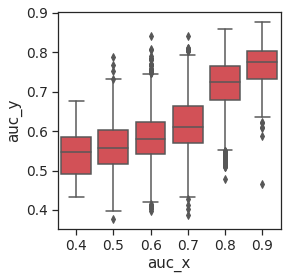

In [204]:
auc_gene_hic_exp_subset[0]['auc_x'] = auc_gene_hic_exp_subset[0]['auc_x'].round(1)
auc_gene_hic_exp_subset[0]['s2'] = 'mouse'
sns.boxplot(data=auc_gene_hic_exp_subset[0], x='auc_x', y='auc_y', palette=['#E83B43'])

<AxesSubplot:xlabel='auc_x', ylabel='auc_y'>

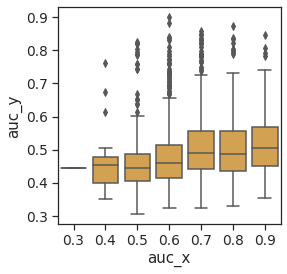

In [202]:
auc_gene_hic_exp_subset[1]['auc_x'] = auc_gene_hic_exp_subset[1]['auc_x'].round(1)
auc_gene_hic_exp_subset[1]['s2'] = 'dro'
sns.boxplot(data=auc_gene_hic_exp_subset[1], x='auc_x', y='auc_y', palette=['#E8A63B'])

In [6]:
dfc = pd.concat([auc_gene_hic_exp_subset[0], auc_gene_hic_exp_subset[1]])

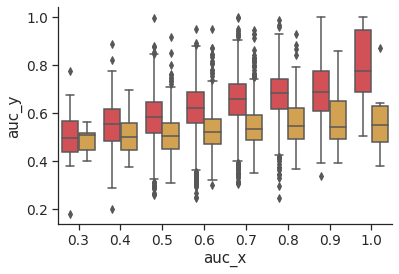

In [8]:
#rcParams['figure.figsize'] = 6,4
import seaborn as sns
import colorcet as cc



palette = sns.color_palette(cc.glasbey, n_colors=18)


sns.set_style("whitegrid", {'axes.grid' : False})
sns.set_style("ticks")


sc_bar = sns.boxplot(data=dfc, x='auc_x', y='auc_y', palette=['#E83B43', '#E8A63B'], hue='s2')
sc_bar.legend().remove()
sns.despine()

In [20]:
import pandas as pd
df_list = []
df_exp_rank = pd.read_csv('/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/software/CoCoCoNet/orthologMaps/human_mouse_orthoNM.csv')
df_exp_rank = df_exp_rank.drop_duplicates(subset=['human'], keep=False)
df_exp_rank = df_exp_rank.drop_duplicates(subset=['mouse'], keep=False)
file_path_1 = "/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_mouse/aggregates/10kbp_raw/max/jac_sim/90/all_bins/KR_ranked_KR/all/hic_gene_corr_gw_1_percent_per_chr.csv"

auc_values_1 = pd.read_csv(file_path_1, sep='\t')
#auc_values_1 = auc_values_1[auc_values_1['auc'] > np.percentile(auc_values_1['auc'], 90)]
df1 = df_exp_rank.merge(auc_values_1, left_on='mouse', right_on='gene_id_exp_file')
file_path_2 = "/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_human/aggregates/10kbp_raw/max/jac_sim/90/all_bins/KR_ranked_KR/all/hic_gene_corr_gw_1_percent_per_chr.csv"
auc_values_1 = pd.read_csv(file_path_2, sep='\t')
#auc_values_1 = auc_values_1[auc_values_1['auc'] > np.percentile(auc_values_1['auc'], 90)]
df2 = df1.merge(auc_values_1, left_on='human', right_on='gene_id_exp_file')
df2['species'] = 'Mouse'
df2['auc'] = (df2['auc_x']*10).astype(int)
df2['auc'] = (df2['auc'].astype(float))
df2['auc'] = (df2['auc'] / 10)
df_list.append(df2)


In [149]:
auc_values_1 = pd.DataFrame(columns = ['auc', 'mya', 'species_1', 'species_2', 'gene_id_jac_sim'])
auc_list = []
#for species_2, col_num in zip(['human', 'mouse', 'drosophila'], [5, 7, 4]):
for species_2, col_num in zip(['human'], [5]):
    ['mammlia', 'chordata', 'metazoa', 'insect', 'chrodata_artho']
    mya = pd.read_csv("/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/software/CoCoCoNet/spe39_divergence_timetree.csv")
    mya_ben = pd.read_csv("/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/software/CoCoCoNet/species_classification_ranks_processed.txt")
    

    mya_2 = mya.fillna(0).to_numpy()[:-1,1::] + mya.fillna(0).to_numpy()[:-1,1::].T

    mya_l = mya_2[:,col_num].tolist()

    species_name = mya.fillna(0).to_numpy()[:-1,0].tolist()

    mya = pd.DataFrame(list(zip(species_name , mya_l)), columns=['species','mya'])

    mya['species'] = [x if x!= "fly" else "drosophila" for x in mya['species']]

    import numpy as np

    for species, mya_dist in zip(mya['species'].tolist(), mya['mya'].tolist()):
        try:
            #if species_2 == 'drosophila':
            #    file_path_1 = f"/grid/gillis/data/lohia/hi_c_data_processing/data_{species_2}/aggregates/1kbp_raw/max/intra_only/hic_gene_KR_intra_1_percent_per_chr_{species}_aggregates_with_coexp_{species_2}_chordata"
            #else:
            #    file_path_1 = f"/grid/gillis/data/lohia/hi_c_data_processing/data_{species_2}/aggregates/1kbp_raw/max/intra_only/hic_gene_KR_intra_1_percent_per_chr_{species}_aggregates_with_coexp_{species_2}_chordata"
                
            #if species_2 == 'drosophila':
            #    file_path_1 = f"/grid/gillis/data/lohia/hi_c_data_processing/data_{species_2}/aggregates/1kbp_raw/max/intra_only/hic_gene_KR_intra_1_percent_per_chr_{species}_aggregates_with_coexp.csv"
            file_path_1 = f"/grid/gillis/data/lohia/hi_c_data_processing/software/CoCoCoNet/networks/coexp_consv_with_trans/coexp_inter_only_1_percent_per_chr_{species_2}_{species}_one_sided_chordata"

            #file_path_1 = f"/grid/gillis/data/lohia/hi_c_data_processing/software/CoCoCoNet/networks/coexp_consv_with_trans/coexp_intra_only_1_percent_per_chr_{species_2}_{species}_one_sided.csv"
            #print (file_path_1)

            auc_values_1 = pd.read_csv(file_path_1, sep='\t')
            #print (auc_values_1)
            #gene_l = ortho_file['human'].tolist()
            #auc_values_1 = auc_values_1[auc_values_1['gene_id_jac_sim'].isin(gene_l)]
            #print (auc_values_1)
            auc_values_1['mya'] = mya_dist
            true_species = ["fruitfly" if x=='drosophila' else x for x in [species]]
            true_species_2 = ["fruitfly" if x=='drosophila' else x for x in [species_2]]
            auc_values_1['species_1'] = true_species[0]
            auc_values_1['species_2'] = true_species_2[0]
            auc_list.append(auc_values_1[['auc', 'mya', 'species_1', 'species_2', 'gene_id_jac_sim']])


        except:
            auc_values_1['mya'] = np.nan
            true_species = ["fruitfly" if x=='drosophila' else x for x in [species]]
            true_species_2 = ["fruitfly" if x=='drosophila' else x for x in [species_2]]
            auc_values_1['species_1'] = true_species[0]
            auc_values_1['species_2'] = true_species_2[0]
            print (species)
            auc_list.append(auc_values_1[['auc', 'mya', 'species_1', 'species_2', 'gene_id_jac_sim']])
            

arabidopsis
drosophila
maize
rice
soybean
brome
grape
medicago
potato
sorghum
tomato
mustard
chlam
afrog
apple
tobacco


In [8]:
df = pd.concat(df_list)

In [302]:
auc_values_1 = pd.DataFrame(columns = ['auc', 'mya', 'species_1', 'species_2', 'gene_id_jac_sim'])
auc_list = []
#for species_2, col_num in zip(['human', 'mouse', 'drosophila'], [5, 7, 4]):
for species_2, col_num in zip(['human'], [5]):
    ['mammlia', 'chordata', 'metazoa', 'insect', 'chrodata_artho']
    mya = pd.read_csv("/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/software/CoCoCoNet/spe39_divergence_timetree.csv")
    mya_ben = pd.read_csv("/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/software/CoCoCoNet/species_classification_ranks_processed.txt")
    

    mya_2 = mya.fillna(0).to_numpy()[:-1,1::] + mya.fillna(0).to_numpy()[:-1,1::].T

    mya_l = mya_2[:,col_num].tolist()

    species_name = mya.fillna(0).to_numpy()[:-1,0].tolist()

    mya = pd.DataFrame(list(zip(species_name , mya_l)), columns=['species','mya'])

    mya['species'] = [x if x!= "fly" else "drosophila" for x in mya['species']]

    import numpy as np

    for species, mya_dist in zip(mya['species'].tolist(), mya['mya'].tolist()):
        try:
            if species_2 == 'drosophila':
                file_path_1 = f"/grid/gillis/data/lohia/hi_c_data_processing/data_{species_2}/aggregates/25kbp_raw/max/inter_only/hic_gene_KR_inter_1_percent_per_chr_{species}_aggregates_with_coexp_{species_2}_chordata"
            else:
                file_path_1 = f"/grid/gillis/data/lohia/hi_c_data_processing/data_{species_2}/aggregates/25kbp_raw/max/inter_only/hic_gene_KR_inter_1_percent_per_chr_{species}_aggregates_with_coexp_{species_2}_chordata"
                
            #if species_2 == 'drosophila':
            #    file_path_1 = f"/grid/gillis/data/lohia/hi_c_data_processing/data_{species_2}/aggregates/1kbp_raw/max/intra_only/hic_gene_KR_intra_1_percent_per_chr_{species}_aggregates_with_coexp.csv"
            #else:
            #    file_path_1 = f"/grid/gillis/data/lohia/hi_c_data_processing/data_{species_2}/aggregates/1kbp_raw/max/intra_only/hic_gene_KR_intra_1_percent_per_chr_{species}_aggregates_with_coexp.csv"

            auc_values_1 = pd.read_csv(file_path_1, sep='\t')
            #print (auc_values_1)
            #gene_l = ortho_file['human'].tolist()
            #auc_values_1 = auc_values_1[auc_values_1['gene_id_jac_sim'].isin(gene_l)]
            #print (auc_values_1)
            auc_values_1['mya'] = mya_dist
            true_species = ["fruitfly" if x=='drosophila' else x for x in [species]]
            true_species_2 = ["fruitfly" if x=='drosophila' else x for x in [species_2]]
            auc_values_1['species_1'] = true_species[0]
            auc_values_1['species_2'] = true_species_2[0]
            auc_list.append(auc_values_1[['auc', 'mya', 'species_1', 'species_2', 'gene_id_jac_sim']])


        except:
            auc_values_1['mya'] = np.nan
            true_species = ["fruitfly" if x=='drosophila' else x for x in [species]]
            true_species_2 = ["fruitfly" if x=='drosophila' else x for x in [species_2]]
            auc_values_1['species_1'] = true_species[0]
            auc_values_1['species_2'] = true_species_2[0]
            print (species)
            auc_list.append(auc_values_1[['auc', 'mya', 'species_1', 'species_2', 'gene_id_jac_sim']])
            

arabidopsis
drosophila
maize
rice
soybean
brome
grape
medicago
potato
sorghum
tomato
mustard
chlam
afrog
apple
tobacco


In [303]:
df_species_auc = pd.concat(auc_list)

df_species_auc.dropna(inplace=True)

df_species_auc = df_species_auc.merge(mya_ben, left_on='species_1', right_on='saved_name')

df_species_auc['count'] = 1

In [304]:
df_species_auc = df_species_auc[df_species_auc['phylum']=='Chordata']
#df_species_auc = df_species_auc[df_species_auc['class'] == 'Mammalia']



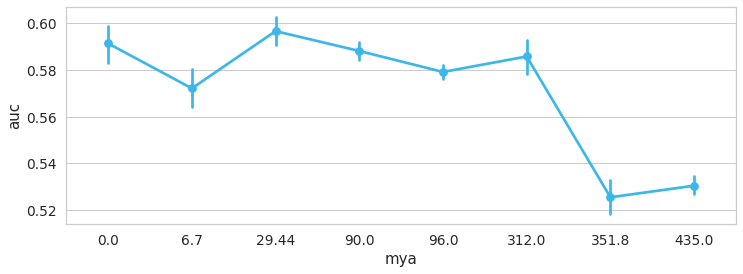

In [292]:
sc_bar = sns.pointplot(data=df_species_auc, x='mya', y='auc', hue='species_2', palette=['#3CB7E8'], estimator=np.mean, linewidth=3, ci=68, err_style='bars')
#sns.scatterplot(data=df_species_auc.groupby(['species_2', 'species_1', 'mya'])['auc'].median().reset_index(), x='mya', y='auc', hue='species_2', palette=['#E8A63B', '#3CB7E8', '#E8A63B'], estimator=np.median)
sc_bar.legend().remove()


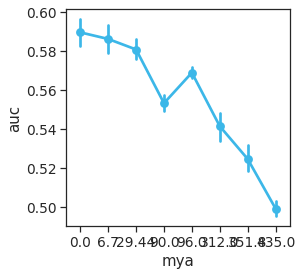

In [150]:
sc_bar = sns.pointplot(data=df_species_auc, x='mya', y='auc', hue='species_2', palette=['#3CB7E8'], estimator=np.mean, linewidth=3, ci=68, err_style='bars')
#sns.scatterplot(data=df_species_auc.groupby(['species_2', 'species_1', 'mya'])['auc'].median().reset_index(), x='mya', y='auc', hue='species_2', palette=['#E8A63B', '#3CB7E8', '#E8A63B'], estimator=np.median)
sc_bar.legend().remove()



TypeError: 'NoneType' object is not callable

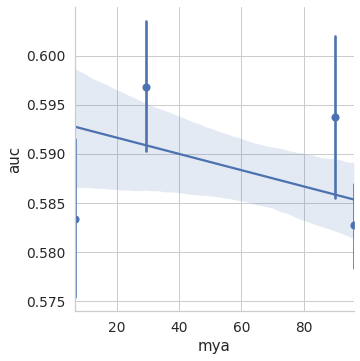

In [239]:
sc_bar = sns.lmplot(data=df_species_auc, x='mya', y='auc', x_estimator=np.mean)
#sns.scatterplot(data=df_species_auc.groupby(['species_2', 'species_1', 'mya'])['auc'].median().reset_index(), x='mya', y='auc', hue='species_2', palette=['#E8A63B', '#3CB7E8', '#E8A63B'], estimator=np.median)
sc_bar.legend().remove()



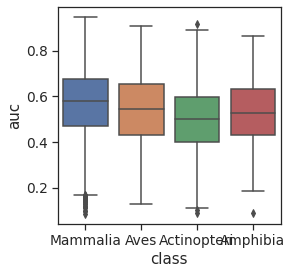

In [193]:
sc_bar = sns.boxplot(data=df_species_auc, x='class', y='auc')
#sns.scatterplot(data=df_species_auc.groupby(['species_2', 'species_1', 'mya'])['auc'].median().reset_index(), x='mya', y='auc', hue='species_2', palette=['#E8A63B', '#3CB7E8', '#E8A63B'], estimator=np.median)
sc_bar.legend().remove()



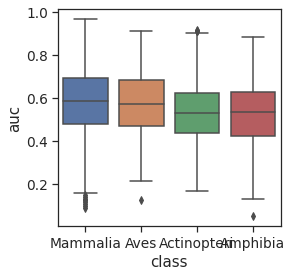

In [199]:
sc_bar = sns.boxplot(data=df_species_auc, x='class', y='auc')
#sns.scatterplot(data=df_species_auc.groupby(['species_2', 'species_1', 'mya'])['auc'].median().reset_index(), x='mya', y='auc', hue='species_2', palette=['#E8A63B', '#3CB7E8', '#E8A63B'], estimator=np.median)
sc_bar.legend().remove()


TypeError: 'NoneType' object is not callable

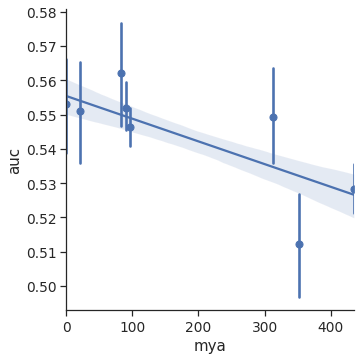

In [177]:
sc_bar = sns.lmplot(data=df_species_auc, x='mya', y='auc', x_estimator=np.mean)
#sns.scatterplot(data=df_species_auc.groupby(['species_2', 'species_1', 'mya'])['auc'].median().reset_index(), x='mya', y='auc', hue='species_2', palette=['#E8A63B', '#3CB7E8', '#E8A63B'], estimator=np.median)
sc_bar.legend().remove()

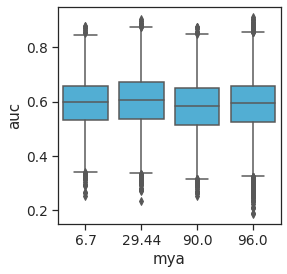

In [158]:
sc_bar = sns.boxplot(data=df_species_auc[df_species_auc['species_1']!='human'], x='mya', y='auc', palette=['#3CB7E8'])
#sns.scatterplot(data=df_species_auc.groupby(['species_2', 'species_1', 'mya'])['auc'].median().reset_index(), x='mya', y='auc', hue='species_2', palette=['#E8A63B', '#3CB7E8', '#E8A63B'], estimator=np.median)
sc_bar.legend().remove()



In [143]:
df_species_auc[df_species_auc['species_1']!='human']

auc    mya     species_1 species_2  gene_id_jac_sim  \
0     0.849246   96.0          boar     human  ENSG00000112365   
1     0.844724   96.0          boar     human  ENSG00000120438   
2     0.669849   96.0          boar     human  ENSG00000130024   
3     0.885854   96.0          boar     human  ENSG00000070269   
4     0.707426   96.0          boar     human  ENSG00000198887   
...        ...    ...           ...       ...              ...   
8320  0.647711  435.0  rainbowtrout     human  ENSG00000100304   
8321  0.728675  435.0  rainbowtrout     human  ENSG00000100109   
8322  0.459277  435.0  rainbowtrout     human  ENSG00000099949   
8323  0.840000  435.0  rainbowtrout     human  ENSG00000184708   
8324  0.651887  435.0  rainbowtrout     human  ENSG00000101868   

                  Species    Common_name  Tax_ID superkingdom  kingdom  \
0              Sus scrofa           Boar    9823    Eukaryota  Metazoa   
1              Sus scrofa           Boar    9823    Eukaryota  Metazoa   
2              Sus scrofa           Boar    9823    Eukaryota  Metazoa   
3              Sus scrofa           Boar    9823    Eukaryota  Metazoa   
4              Sus scrofa           Boar    9823    Eukaryota  Metazoa   
...                   ...            ...     ...          ...      ...   
8320  Oncorhynchus mykiss  Rainbow trout    8022    Eukaryota  Metazoa   
8321  Oncorhynchus mykiss  Rainbow trout    8022    Eukaryota  Metazoa   
8322  Oncorhynchus mykiss  Rainbow trout    8022    Eukaryota  Metazoa   
8323  Oncorhynchus mykiss  Rainbow trout    8022    Eukaryota  Metazoa   
8324  Oncorhynchus mykiss  Rainbow trout    8022    Eukaryota  Metazoa   

        phylum        class          order      family         genus species  \
0     Chordata     Mammalia   Artiodactyla      Suidae           Sus     NaN   
1     Chordata     Mammalia   Artiodactyla      Suidae           Sus     NaN   
2     Chordata     Mammalia   Artiodactyla      Suidae           Sus     NaN   
3     Chordata     Mammalia   Artiodactyla      Suidae           Sus     NaN   
4     Chordata     Mammalia   Artiodactyla      Suidae           Sus     NaN   
...        ...          ...            ...         ...           ...     ...   
8320  Chordata  Actinopteri  Salmoniformes  Salmonidae  Oncorhynchus     NaN   
8321  Chordata  Actinopteri  Salmoniformes  Salmonidae  Oncorhynchus     NaN   
8322  Chordata  Actinopteri  Salmoniformes  Salmonidae  Oncorhynchus     NaN   
8323  Chordata  Actinopteri  Salmoniformes  Salmonidae  Oncorhynchus     NaN   
8324  Chordata  Actinopteri  Salmoniformes  Salmonidae  Oncorhynchus     NaN   

        saved_name  count  
0             boar      1  
1             boar      1  
2             boar      1  
3             boar      1  
4             boar      1  
...            ...    ...  
8320  rainbowtrout      1  
8321  rainbowtrout      1  
8322  rainbowtrout      1  
8323  rainbowtrout      1  
8324  rainbowtrout      1  

[7310 rows x 18 columns]

In [389]:
!pip install colorcet

     |████████████████████████████████| 1.6 MB 11.3 MB/s eta 0:00:01
     |████████████████████████████████| 85 kB 475 kB/s s eta 0:00:01


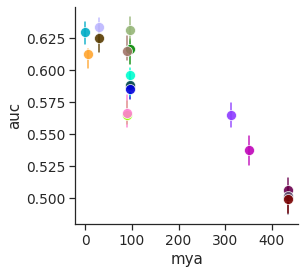

In [305]:
rcParams['figure.figsize'] = 4,4
import seaborn as sns
import colorcet as cc



palette = sns.color_palette(cc.glasbey, n_colors=df_species_auc['species_1'].nunique())


sns.set_style("whitegrid", {'axes.grid' : False})
sns.set_style("ticks")


sc_bar = sns.lineplot(data=df_species_auc, x='mya', y='auc', hue='species_1', estimator=np.median, linewidth=50, ci=68, err_style='bars', marker='o', markersize=10, palette=palette, alpha=0.9)
#sns.scatterplot(data=df_species_auc, x='mya', y='auc', hue='species_1', color='black', estimator=np.median, marker='o', size=10)
#sns.scatterplot(data=df_species_auc, x='mya', y='auc', hue='species_2', palette=['#3CB7E8'], estimator=np.median)
#sns.lineplot(data=df_species_auc, x='species_1', y='auc', hue='species_2', palette=['#3CB7E8'], estimator=np.median, linewidth=3, ci=68, err_style='bars')
#sns.scatterplot(data=df_species_auc.groupby(['species_2', 'species_1', 'mya'])['auc'].median().reset_index(), x='mya', y='auc', hue='species_2', palette=['#E8A63B', '#3CB7E8', '#E8A63B'], estimator=np.median)
sc_bar.legend().remove()
sns.despine()

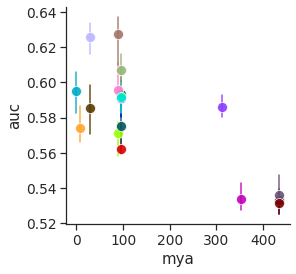

In [301]:
rcParams['figure.figsize'] = 4,4
import seaborn as sns
import colorcet as cc



palette = sns.color_palette(cc.glasbey, n_colors=df_species_auc['species_1'].nunique())


sns.set_style("whitegrid", {'axes.grid' : False})
sns.set_style("ticks")


sc_bar = sns.lineplot(data=df_species_auc, x='mya', y='auc', hue='species_1', estimator=np.median, linewidth=50, ci=68, err_style='bars', marker='o', markersize=10, palette=palette, alpha=0.9)
#sns.scatterplot(data=df_species_auc, x='mya', y='auc', hue='species_1', color='black', estimator=np.median, marker='o', size=10)
#sns.scatterplot(data=df_species_auc, x='mya', y='auc', hue='species_2', palette=['#3CB7E8'], estimator=np.median)
#sns.lineplot(data=df_species_auc, x='species_1', y='auc', hue='species_2', palette=['#3CB7E8'], estimator=np.median, linewidth=3, ci=68, err_style='bars')
#sns.scatterplot(data=df_species_auc.groupby(['species_2', 'species_1', 'mya'])['auc'].median().reset_index(), x='mya', y='auc', hue='species_2', palette=['#E8A63B', '#3CB7E8', '#E8A63B'], estimator=np.median)
sc_bar.legend().remove()
sns.despine()

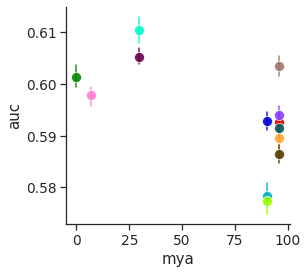

In [155]:
rcParams['figure.figsize'] = 4,4
import seaborn as sns
import colorcet as cc



palette = sns.color_palette(cc.glasbey, n_colors=df_species_auc['species_1'].nunique())


sns.set_style("whitegrid", {'axes.grid' : False})
sns.set_style("ticks")


sc_bar = sns.lineplot(data=df_species_auc, x='mya', y='auc', hue='species_1', estimator=np.median, linewidth=50, ci=68, err_style='bars', marker='o', markersize=10, palette=palette, alpha=0.9)
#sns.scatterplot(data=df_species_auc, x='mya', y='auc', hue='species_1', color='black', estimator=np.median, marker='o', size=10)
#sns.scatterplot(data=df_species_auc, x='mya', y='auc', hue='species_2', palette=['#3CB7E8'], estimator=np.median)
#sns.lineplot(data=df_species_auc, x='species_1', y='auc', hue='species_2', palette=['#3CB7E8'], estimator=np.median, linewidth=3, ci=68, err_style='bars')
#sns.scatterplot(data=df_species_auc.groupby(['species_2', 'species_1', 'mya'])['auc'].median().reset_index(), x='mya', y='auc', hue='species_2', palette=['#E8A63B', '#3CB7E8', '#E8A63B'], estimator=np.median)
sc_bar.legend().remove()
sns.despine()

In [218]:
df_species_auc.groupby(['mya', 'Common_name'])['auc'].mean()

mya     Common_name        
0.00    Human                  0.589635
6.70    Chimpanzee             0.586244
29.44   Crab-eating macaque    0.570483
        Rhesus macaque         0.591212
90.00   European rabbit        0.580571
        Mouse                  0.546115
        Rat                    0.533251
96.00   Boar                   0.565312
        Cow                    0.577497
        Dog                    0.567436
        Goat                   0.571712
        Horse                  0.557890
        Sheep                  0.573959
312.00  Chicken                0.541501
351.80  Western clawed frog    0.524697
435.00  Atlantic salmon        0.489169
        Rainbow trout          0.497099
        Zebrafish              0.511558
Name: auc, dtype: float64

In [337]:
df_species_auc

auc    mya     species_1 species_2  gene_id_jac_sim  \
0     0.565743   96.0          boar     human  ENSG00000112365   
1     0.854408   96.0          boar     human  ENSG00000120438   
2     0.323426   96.0          boar     human  ENSG00000130024   
3     0.596088   96.0          boar     human  ENSG00000070269   
4     0.672953   96.0          boar     human  ENSG00000198887   
...        ...    ...           ...       ...              ...   
8299  0.475362  435.0  rainbowtrout     human  ENSG00000099910   
8300  0.604348  435.0  rainbowtrout     human  ENSG00000100304   
8301  0.481159  435.0  rainbowtrout     human  ENSG00000100109   
8302  0.454106  435.0  rainbowtrout     human  ENSG00000099949   
8303  0.570048  435.0  rainbowtrout     human  ENSG00000184708   

                  Species    Common_name  Tax_ID superkingdom  kingdom  \
0              Sus scrofa           Boar    9823    Eukaryota  Metazoa   
1              Sus scrofa           Boar    9823    Eukaryota  Metazoa   
2              Sus scrofa           Boar    9823    Eukaryota  Metazoa   
3              Sus scrofa           Boar    9823    Eukaryota  Metazoa   
4              Sus scrofa           Boar    9823    Eukaryota  Metazoa   
...                   ...            ...     ...          ...      ...   
8299  Oncorhynchus mykiss  Rainbow trout    8022    Eukaryota  Metazoa   
8300  Oncorhynchus mykiss  Rainbow trout    8022    Eukaryota  Metazoa   
8301  Oncorhynchus mykiss  Rainbow trout    8022    Eukaryota  Metazoa   
8302  Oncorhynchus mykiss  Rainbow trout    8022    Eukaryota  Metazoa   
8303  Oncorhynchus mykiss  Rainbow trout    8022    Eukaryota  Metazoa   

        phylum        class          order      family         genus species  \
0     Chordata     Mammalia   Artiodactyla      Suidae           Sus     NaN   
1     Chordata     Mammalia   Artiodactyla      Suidae           Sus     NaN   
2     Chordata     Mammalia   Artiodactyla      Suidae           Sus     NaN   
3     Chordata     Mammalia   Artiodactyla      Suidae           Sus     NaN   
4     Chordata     Mammalia   Artiodactyla      Suidae           Sus     NaN   
...        ...          ...            ...         ...           ...     ...   
8299  Chordata  Actinopteri  Salmoniformes  Salmonidae  Oncorhynchus     NaN   
8300  Chordata  Actinopteri  Salmoniformes  Salmonidae  Oncorhynchus     NaN   
8301  Chordata  Actinopteri  Salmoniformes  Salmonidae  Oncorhynchus     NaN   
8302  Chordata  Actinopteri  Salmoniformes  Salmonidae  Oncorhynchus     NaN   
8303  Chordata  Actinopteri  Salmoniformes  Salmonidae  Oncorhynchus     NaN   

        saved_name  count  
0             boar      1  
1             boar      1  
2             boar      1  
3             boar      1  
4             boar      1  
...            ...    ...  
8299  rainbowtrout      1  
8300  rainbowtrout      1  
8301  rainbowtrout      1  
8302  rainbowtrout      1  
8303  rainbowtrout      1  

[7722 rows x 18 columns]

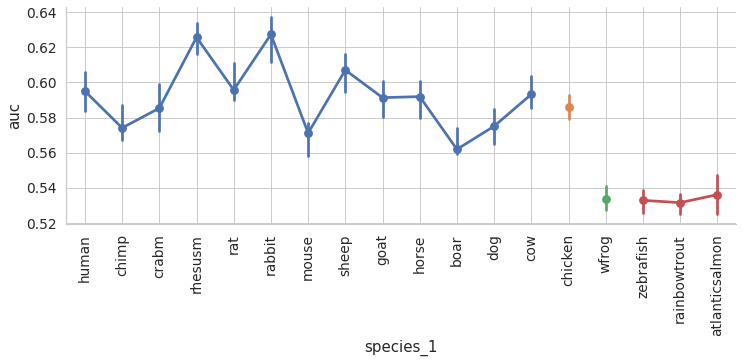

In [293]:
from matplotlib import rcParams
fig, ax = plt.subplots()
sns.set_style("ticks")
sns.despine()
sns.set_style("whitegrid")
#sns.axes_style("whitegrid")
rcParams['figure.figsize'] = 12,4
sns.axes_style("whitegrid")
sc_bar = sns.pointplot(data=df_species_auc[df_species_auc['species_2']=='human'].sort_values(by=['mya']), x='species_1', y='auc', hue='class', estimator=np.median, linewidth=3, ci=68, err_style='bars', sort= False, ax=ax, join=True)
#sns.scatterplot(data=df_species_auc.groupby(['species_2', 'species_1', 'mya'])['auc'].median().reset_index(), x='mya', y='auc', hue='species_2', palette=['#E8A63B', '#3CB7E8', '#E8A63B'], estimator=np.median)
sc_bar.legend().remove()
#sns.despine()
plt.xticks(rotation=90)
ax.xaxis.grid(True)
ax.yaxis.grid(True)


#plt.savefig('/grid/gillis/data/lohia/hi_c_data_processing/notebooks/figures/human_species_hic_coexp.pdf',
#            transparent=True, bbox_inches="tight")

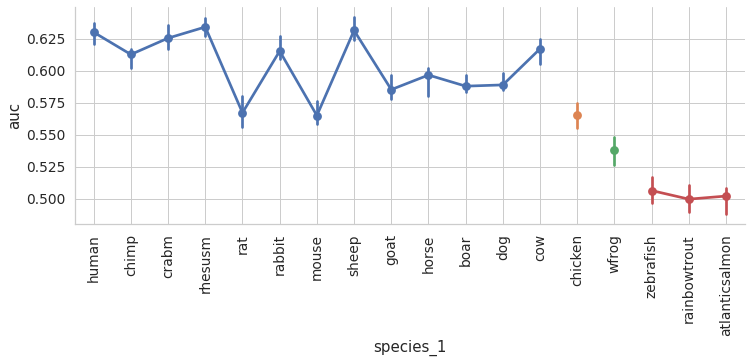

In [307]:
from matplotlib import rcParams
fig, ax = plt.subplots()
sns.set_style("ticks")
sns.despine()
sns.set_style("whitegrid")
#sns.axes_style("whitegrid")
rcParams['figure.figsize'] = 12,4
sns.axes_style("whitegrid")
sc_bar = sns.pointplot(data=df_species_auc[df_species_auc['species_2']=='human'].sort_values(by=['mya']), x='species_1', y='auc', hue='class', estimator=np.median, linewidth=3, ci=68, err_style='bars', sort= False, ax=ax, join=True)
#sns.scatterplot(data=df_species_auc.groupby(['species_2', 'species_1', 'mya'])['auc'].median().reset_index(), x='mya', y='auc', hue='species_2', palette=['#E8A63B', '#3CB7E8', '#E8A63B'], estimator=np.median)
sc_bar.legend().remove()
#sns.despine()
plt.xticks(rotation=90)
ax.xaxis.grid(True)
ax.yaxis.grid(True)


#plt.savefig('/grid/gillis/data/lohia/hi_c_data_processing/notebooks/figures/human_species_hic_coexp.pdf',
#            transparent=True, bbox_inches="tight")

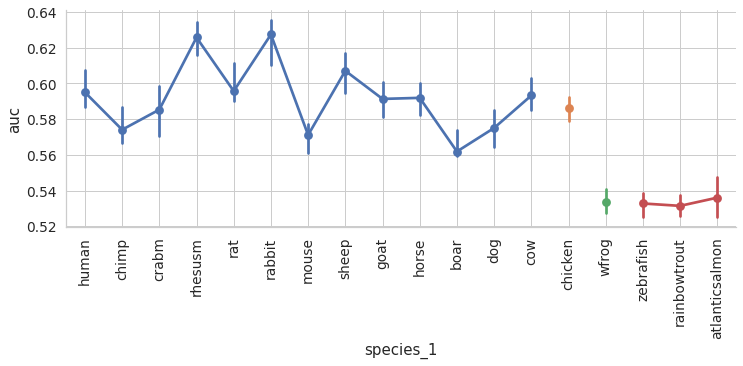

In [274]:
from matplotlib import rcParams
fig, ax = plt.subplots()
sns.set_style("ticks")
sns.despine()
sns.set_style("whitegrid")
#sns.axes_style("whitegrid")
rcParams['figure.figsize'] = 12,4
sns.axes_style("whitegrid")
sc_bar = sns.pointplot(data=df_species_auc[df_species_auc['species_2']=='human'].sort_values(by=['mya']), x='species_1', y='auc', hue='class', estimator=np.median, linewidth=3, ci=68, err_style='bars', sort= False, ax=ax, join=True)
#sns.scatterplot(data=df_species_auc.groupby(['species_2', 'species_1', 'mya'])['auc'].median().reset_index(), x='mya', y='auc', hue='species_2', palette=['#E8A63B', '#3CB7E8', '#E8A63B'], estimator=np.median)
sc_bar.legend().remove()
#sns.despine()
plt.xticks(rotation=90)
ax.xaxis.grid(True)
ax.yaxis.grid(True)


#plt.savefig('/grid/gillis/data/lohia/hi_c_data_processing/notebooks/figures/human_species_hic_coexp.pdf',
#            transparent=True, bbox_inches="tight")

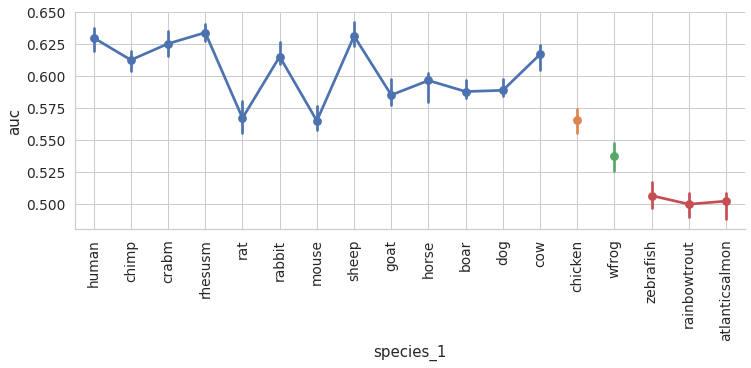

In [279]:
from matplotlib import rcParams
fig, ax = plt.subplots()
sns.set_style("ticks")
sns.despine()
sns.set_style("whitegrid")
#sns.axes_style("whitegrid")
rcParams['figure.figsize'] = 12,4
sns.axes_style("whitegrid")
sc_bar = sns.pointplot(data=df_species_auc[df_species_auc['species_2']=='human'].sort_values(by=['mya']), x='species_1', y='auc', hue='class', estimator=np.median, linewidth=3, ci=68, err_style='bars', sort= False, ax=ax, join=True)
#sns.scatterplot(data=df_species_auc.groupby(['species_2', 'species_1', 'mya'])['auc'].median().reset_index(), x='mya', y='auc', hue='species_2', palette=['#E8A63B', '#3CB7E8', '#E8A63B'], estimator=np.median)
sc_bar.legend().remove()
#sns.despine()
plt.xticks(rotation=90)
ax.xaxis.grid(True)
ax.yaxis.grid(True)


#plt.savefig('/grid/gillis/data/lohia/hi_c_data_processing/notebooks/figures/human_species_hic_coexp.pdf',
#            transparent=True, bbox_inches="tight")

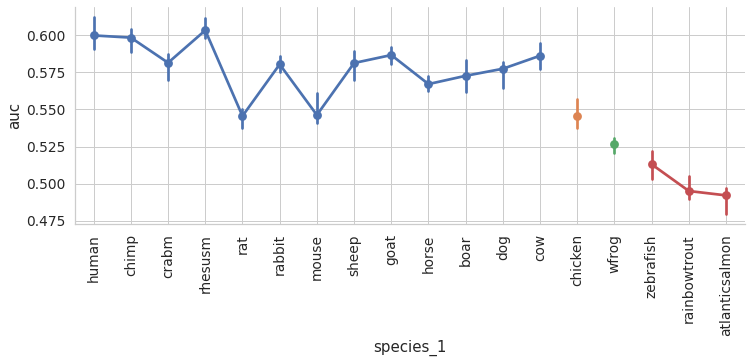

In [122]:
from matplotlib import rcParams
fig, ax = plt.subplots()
sns.set_style("ticks")
sns.despine()
sns.set_style("whitegrid")
#sns.axes_style("whitegrid")
rcParams['figure.figsize'] = 12,4
sns.axes_style("whitegrid")
sc_bar = sns.pointplot(data=df_species_auc[df_species_auc['species_2']=='human'].sort_values(by=['mya']), x='species_1', y='auc', hue='class', estimator=np.median, linewidth=3, ci=68, err_style='bars', sort= False, ax=ax, join=True)
#sns.scatterplot(data=df_species_auc.groupby(['species_2', 'species_1', 'mya'])['auc'].median().reset_index(), x='mya', y='auc', hue='species_2', palette=['#E8A63B', '#3CB7E8', '#E8A63B'], estimator=np.median)
sc_bar.legend().remove()
#sns.despine()
plt.xticks(rotation=90)
ax.xaxis.grid(True)
ax.yaxis.grid(True)


#plt.savefig('/grid/gillis/data/lohia/hi_c_data_processing/notebooks/figures/human_species_hic_coexp.pdf',
#            transparent=True, bbox_inches="tight")

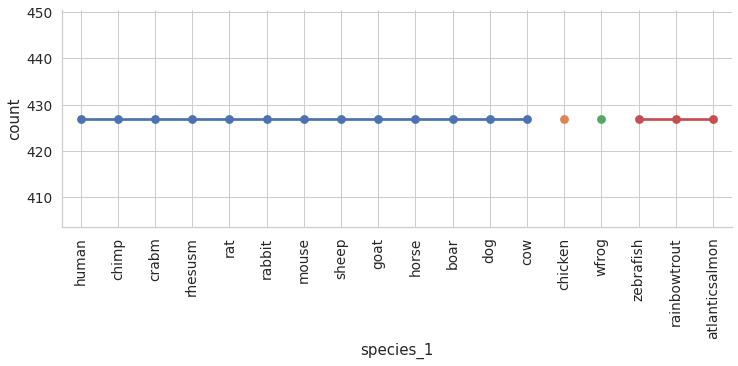

In [43]:
from matplotlib import rcParams
fig, ax = plt.subplots()
sns.set_style("ticks")
sns.despine()
sns.set_style("whitegrid")
#sns.axes_style("whitegrid")
rcParams['figure.figsize'] = 12,4
sns.axes_style("whitegrid")
sc_bar = sns.pointplot(data=df_species_auc[df_species_auc['species_2']=='human'].sort_values(by=['mya']), x='species_1', y='count', hue='class', estimator=np.sum, linewidth=3, ci=68, err_style='bars', sort= False, ax=ax, join=True)
#sns.scatterplot(data=df_species_auc.groupby(['species_2', 'species_1', 'mya'])['auc'].median().reset_index(), x='mya', y='auc', hue='species_2', palette=['#E8A63B', '#3CB7E8', '#E8A63B'], estimator=np.median)
sc_bar.legend().remove()
#sns.despine()
plt.xticks(rotation=90)
ax.xaxis.grid(True)
ax.yaxis.grid(True)


#plt.savefig('/grid/gillis/data/lohia/hi_c_data_processing/notebooks/figures/human_species_hic_coexp.pdf',
#            transparent=True, bbox_inches="tight")

In [44]:
df_species_auc[df_species_auc['species_1']=='human']

auc  mya species_1 species_2  gene_id_jac_sim       Species  \
1281  0.422222  0.0     human     human  ENSG00000000457  Homo sapiens   
1282  1.000000  0.0     human     human  ENSG00000000460  Homo sapiens   
1283  0.400000  0.0     human     human  ENSG00000001084  Homo sapiens   
1284  0.500000  0.0     human     human  ENSG00000002016  Homo sapiens   
1285  0.062500  0.0     human     human  ENSG00000003509  Homo sapiens   
...        ...  ...       ...       ...              ...           ...   
1703  0.578947  0.0     human     human  ENSG00000198887  Homo sapiens   
1704  0.866667  0.0     human     human  ENSG00000198924  Homo sapiens   
1705  0.066667  0.0     human     human  ENSG00000204316  Homo sapiens   
1706  0.244444  0.0     human     human  ENSG00000244038  Homo sapiens   
1707  0.076923  0.0     human     human  ENSG00000258366  Homo sapiens   

     Common_name  Tax_ID superkingdom  kingdom    phylum     class     order  \
1281       Human    9606    Eukaryota  Metazoa  Chordata  Mammalia  Primates   
1282       Human    9606    Eukaryota  Metazoa  Chordata  Mammalia  Primates   
1283       Human    9606    Eukaryota  Metazoa  Chordata  Mammalia  Primates   
1284       Human    9606    Eukaryota  Metazoa  Chordata  Mammalia  Primates   
1285       Human    9606    Eukaryota  Metazoa  Chordata  Mammalia  Primates   
...          ...     ...          ...      ...       ...       ...       ...   
1703       Human    9606    Eukaryota  Metazoa  Chordata  Mammalia  Primates   
1704       Human    9606    Eukaryota  Metazoa  Chordata  Mammalia  Primates   
1705       Human    9606    Eukaryota  Metazoa  Chordata  Mammalia  Primates   
1706       Human    9606    Eukaryota  Metazoa  Chordata  Mammalia  Primates   
1707       Human    9606    Eukaryota  Metazoa  Chordata  Mammalia  Primates   

         family genus species saved_name  count  
1281  Hominidae  Homo     NaN      human      1  
1282  Hominidae  Homo     NaN      human      1  
1283  Hominidae  Homo     NaN      human      1  
1284  Hominidae  Homo     NaN      human      1  
1285  Hominidae  Homo     NaN      human      1  
...         ...   ...     ...        ...    ...  
1703  Hominidae  Homo     NaN      human      1  
1704  Hominidae  Homo     NaN      human      1  
1705  Hominidae  Homo     NaN      human      1  
1706  Hominidae  Homo     NaN      human      1  
1707  Hominidae  Homo     NaN      human      1  

[427 rows x 18 columns]

In [279]:
df_species_auc

auc    mya     species_1 species_2  gene_id_jac_sim  \
0     0.280000   96.0          boar     human  ENSG00000112365   
1     0.600000   96.0          boar     human  ENSG00000120438   
2     0.960000   96.0          boar     human  ENSG00000130024   
3     0.846154   96.0          boar     human  ENSG00000070269   
4     0.789474   96.0          boar     human  ENSG00000198887   
...        ...    ...           ...       ...              ...   
8229  1.000000  435.0  rainbowtrout     human  ENSG00000099910   
8230  0.625000  435.0  rainbowtrout     human  ENSG00000100304   
8231  1.000000  435.0  rainbowtrout     human  ENSG00000100109   
8232  1.000000  435.0  rainbowtrout     human  ENSG00000099949   
8233  0.750000  435.0  rainbowtrout     human  ENSG00000184708   

                  Species    Common_name  Tax_ID superkingdom  kingdom  \
0              Sus scrofa           Boar    9823    Eukaryota  Metazoa   
1              Sus scrofa           Boar    9823    Eukaryota  Metazoa   
2              Sus scrofa           Boar    9823    Eukaryota  Metazoa   
3              Sus scrofa           Boar    9823    Eukaryota  Metazoa   
4              Sus scrofa           Boar    9823    Eukaryota  Metazoa   
...                   ...            ...     ...          ...      ...   
8229  Oncorhynchus mykiss  Rainbow trout    8022    Eukaryota  Metazoa   
8230  Oncorhynchus mykiss  Rainbow trout    8022    Eukaryota  Metazoa   
8231  Oncorhynchus mykiss  Rainbow trout    8022    Eukaryota  Metazoa   
8232  Oncorhynchus mykiss  Rainbow trout    8022    Eukaryota  Metazoa   
8233  Oncorhynchus mykiss  Rainbow trout    8022    Eukaryota  Metazoa   

        phylum        class          order      family         genus species  \
0     Chordata     Mammalia   Artiodactyla      Suidae           Sus     NaN   
1     Chordata     Mammalia   Artiodactyla      Suidae           Sus     NaN   
2     Chordata     Mammalia   Artiodactyla      Suidae           Sus     NaN   
3     Chordata     Mammalia   Artiodactyla      Suidae           Sus     NaN   
4     Chordata     Mammalia   Artiodactyla      Suidae           Sus     NaN   
...        ...          ...            ...         ...           ...     ...   
8229  Chordata  Actinopteri  Salmoniformes  Salmonidae  Oncorhynchus     NaN   
8230  Chordata  Actinopteri  Salmoniformes  Salmonidae  Oncorhynchus     NaN   
8231  Chordata  Actinopteri  Salmoniformes  Salmonidae  Oncorhynchus     NaN   
8232  Chordata  Actinopteri  Salmoniformes  Salmonidae  Oncorhynchus     NaN   
8233  Chordata  Actinopteri  Salmoniformes  Salmonidae  Oncorhynchus     NaN   

        saved_name  count  
0             boar      1  
1             boar      1  
2             boar      1  
3             boar      1  
4             boar      1  
...            ...    ...  
8229  rainbowtrout      1  
8230  rainbowtrout      1  
8231  rainbowtrout      1  
8232  rainbowtrout      1  
8233  rainbowtrout      1  

[7686 rows x 18 columns]

In [ ]:
sc_bar = sns.lineplot(data=df_species_auc, x='mya', y='auc', hue='species_2', palette=['#3CB7E8', '#E83B43', '#E8A63B'], estimator=np.median, linewidth=3, ci=68, err_style='bars')
#sns.scatterplot(data=df_species_auc.groupby(['species_2', 'species_1', 'mya'])['auc'].median().reset_index(), x='mya', y='auc', hue='species_2', palette=['#E8A63B', '#3CB7E8', '#E8A63B'], estimator=np.median)
sc_bar.legend().remove()

plt.savefig('/grid/gillis/data/lohia/hi_c_data_processing/notebooks/figures/all_species_hic_coexp.pdf',
            transparent=True)


In [291]:
auc_list = []
#for species_2, col_num in zip(['human', 'mouse', 'drosophila'], [5, 7, 4]):
for species_2, col_num in zip(['human'], [5]):
    ['mammlia', 'chordata', 'metazoa', 'insect', 'chrodata_artho']
    mya = pd.read_csv("/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/software/CoCoCoNet/spe39_divergence_timetree.csv")
    mya_ben = pd.read_csv("/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/software/CoCoCoNet/species_classification_ranks_processed.txt")
    

    mya_2 = mya.fillna(0).to_numpy()[:-1,1::] + mya.fillna(0).to_numpy()[:-1,1::].T

    mya_l = mya_2[:,col_num].tolist()

    species_name = mya.fillna(0).to_numpy()[:-1,0].tolist()

    mya = pd.DataFrame(list(zip(species_name , mya_l)), columns=['species','mya'])

    mya['species'] = [x if x!= "fly" else "drosophila" for x in mya['species']]

    import numpy as np

    for species, mya_dist in zip(mya['species'].tolist(), mya['mya'].tolist()):
        try:
            if species_2 == 'drosophila':
                file_path_1 = f"/grid/gillis/data/lohia/hi_c_data_processing/data_{species_2}/aggregates/10kbp_raw/max/inter_only/hic_gene_KR_inter_1_percent_per_chr_{species}_aggregates_with_coexp.csv"
            else:
                file_path_1 = f"/grid/gillis/data/lohia/hi_c_data_processing/data_{species_2}/aggregates/10kbp_raw/max/inter_only/hic_gene_KR_inter_1_percent_per_chr_{species}_aggregates_with_coexp.csv"

            auc_values_1 = pd.read_csv(file_path_1, sep='\t')
            #print (auc_values_1)
            #gene_l = ortho_file['human'].tolist()
            #auc_values_1 = auc_values_1[auc_values_1['gene_id_jac_sim'].isin(gene_l)]
            #print (auc_values_1)
            auc_values_1['mya'] = mya_dist
            true_species = ["fruitfly" if x=='drosophila' else x for x in [species]]
            true_species_2 = ["fruitfly" if x=='drosophila' else x for x in [species_2]]
            auc_values_1['species_1'] = true_species[0]
            auc_values_1['species_2'] = true_species_2[0]
            auc_list.append(auc_values_1[['auc', 'mya', 'species_1', 'species_2', 'gene_id_jac_sim']])


        except:
            auc_values_1['mya'] = np.nan
            true_species = ["fruitfly" if x=='drosophila' else x for x in [species]]
            true_species_2 = ["fruitfly" if x=='drosophila' else x for x in [species_2]]
            auc_values_1['species_1'] = true_species[0]
            auc_values_1['species_2'] = true_species_2[0]
            print (species)
            auc_list.append(auc_values_1[['auc', 'mya', 'species_1', 'species_2', 'gene_id_jac_sim']])
            

chlam
afrog


In [292]:
df_species_auc = pd.concat(auc_list)

df_species_auc.dropna(inplace=True)

df_species_auc = df_species_auc.merge(mya_ben, left_on='species_1', right_on='saved_name')

df_species_auc['count'] = 1

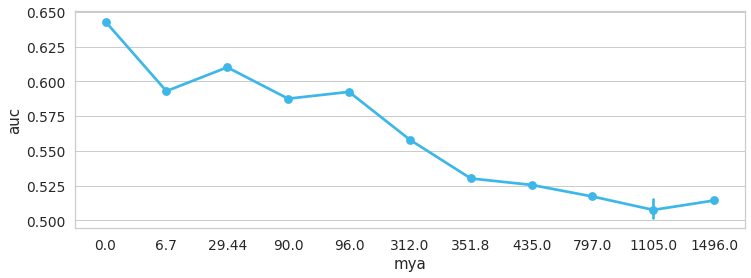

In [293]:
sc_bar = sns.pointplot(data=df_species_auc, x='mya', y='auc', hue='species_2', palette=['#3CB7E8'], estimator=np.median, linewidth=3, ci=68, err_style='bars')
#sns.scatterplot(data=df_species_auc.groupby(['species_2', 'species_1', 'mya'])['auc'].median().reset_index(), x='mya', y='auc', hue='species_2', palette=['#E8A63B', '#3CB7E8', '#E8A63B'], estimator=np.median)
sc_bar.legend().remove()

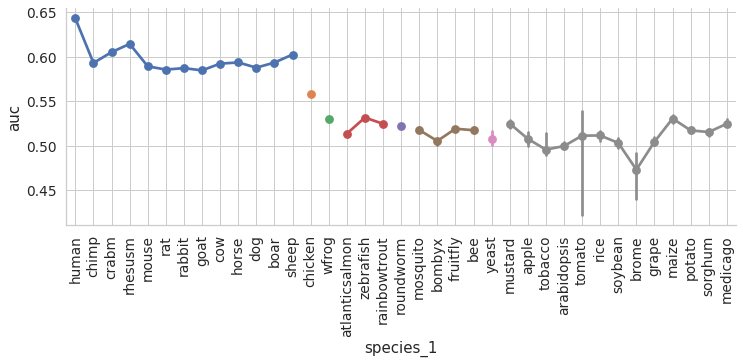

In [294]:
from matplotlib import rcParams
fig, ax = plt.subplots()
sns.set_style("ticks")
sns.despine()
sns.set_style("whitegrid")
#sns.axes_style("whitegrid")
rcParams['figure.figsize'] = 12,4
sns.axes_style("whitegrid")
sc_bar = sns.pointplot(data=df_species_auc[df_species_auc['species_2']=='human'].sort_values(by=['mya']), x='species_1', y='auc', hue='class', estimator=np.median, linewidth=3, ci=68, err_style='bars', sort= False, ax=ax, join=True)
#sns.scatterplot(data=df_species_auc.groupby(['species_2', 'species_1', 'mya'])['auc'].median().reset_index(), x='mya', y='auc', hue='species_2', palette=['#E8A63B', '#3CB7E8', '#E8A63B'], estimator=np.median)
sc_bar.legend().remove()
#sns.despine()
plt.xticks(rotation=90)
ax.xaxis.grid(True)
ax.yaxis.grid(True)


#plt.savefig('/grid/gillis/data/lohia/hi_c_data_processing/notebooks/figures/human_species_hic_coexp.pdf',
#            transparent=True, bbox_inches="tight")